# Radon Transform in Python

**Author :** H. Passe

In [2]:
# We first import common python libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
# Add directory above to import our module
sys.path.append("..")
# We also import our library 
import eucalc

## Computing Radon Transform at a point

Let's create a cubical from a numpy array :

In [3]:
data = np.array([[0,1,0],[1,0,1],[0,0,0]])
cub_cplx = eucalc.EmbeddedComplex(data)

The `cub_cplx` object has class `EmbeddedComplex`. The corresponding complex has sizes `data.shape`. Let's now define a random direction to compute the transform :

In [4]:
direction = np.random.randn(2)
print(direction)

[-0.62681908 -0.06745503]


Showing the complex and th direction :

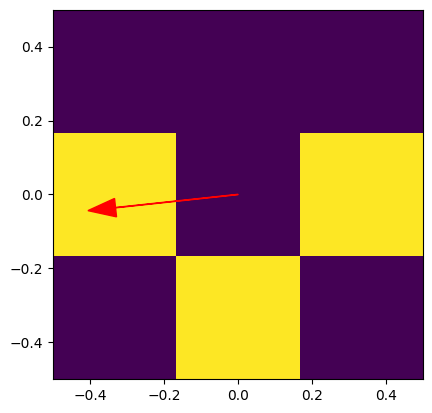

In [5]:
plt.imshow(data,origin="lower",extent=[-0.5,0.5,-0.5,0.5])
normalized_dir = np.divide(direction,3*np.linalg.norm(direction))
plt.arrow(0,0,normalized_dir[0],normalized_dir[1], color='r', head_width = 0.05)

Using `cub_cplx` and `direction` we can create a `RadonTransform` object :

In [6]:
radon = cub_cplx.compute_radon_transform(direction)

_Values[0] = 0
_Values[0] = 0


We can now use `radon` to compute the Radon transform in direction `direction` for every $t \in \mathbb{R}$ :

In [7]:
t = 0.1
radon_t = radon.evaluate(t)
print(radon_t)

1.0


## Plotting Radon Transform

The `RadonTransform` class comes with four attributes. As the Radon Transform is piecewise constant in a direction, a `RadonTransform` object stores the values and the changing points of the transform. We can use the `get_attributes()` method to get an array containing the four the following arrays :
1. T   : The changing points.
2. V   : The values of the Radon transform.
3. T_s : The singular points.
4. V_s : The values of the transform at the singular points.

In [8]:
attributes = radon.get_attributes()
T = attributes[0]
V = attributes[1]
T_s = attributes[2]
V_s = attributes[3]

Now we can start plotting the transform :

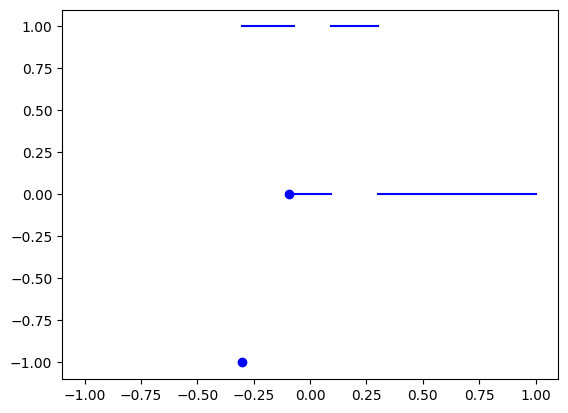

In [9]:
#First interval
plt.plot([-1,T[0]],[0,0],'b')

#Last interval
plt.plot([T[len(T)-1],1], [V[len(V)-1],V[len(V)-1]], 'b')

#Plotting the intervals
for i in range(len(T)-1):
    plt.plot([T[i], T[i+1]], [V[i], V[i]], 'b')

#Plotting the singular points
for i in range(len(T_s)):
    plt.plot([T_s[i]], [V_s[i]], 'b', marker='o')